In [1]:
from HAMILTONIAN import Hamiltonian
from main import TE_PAI
import numpy as np
import matplotlib.pyplot as plt
from tepai_gatecount import find_delta_for_accuracy, gate_count_from_delta


In [37]:
# Physical parameters
q           = 100
rng         = np.random.default_rng(0)
freqs       = rng.uniform(-1, 1, size=q)
sch_hamil   = Hamiltonian.spin_chain_hamil(q, freqs, j=0.1)
nnn_hamil   = Hamiltonian.next_nearest_neighbor_hamil(q, freqs, j1=0.1, j2=0.05)
# TODO: Add in 2D lattice Hamiltonian
times       = np.linspace(0, 1, 21)

# Simulation parameters
MAX_BOND    = 100
EPSILON     = 1e-1
N_per_T     = 1000
N_infty     = 1000
N_s         = 10000  

def get_trotter_lengths(hamil, times, N_per_T):
    return [len(hamil.terms)*N_per_T*t for t in times]

def get_tepai_lengths(hamil, times, N_s, N_infty, epsilon, delta_bounds):
    lengths = []
    deltas  = []

    current_bounds = delta_bounds
    for t in times:
        if t == 0:
            lengths.append(0)
            deltas.append(0)
            continue
        print(f"Computing TE-PAI gate count for T={t}...")
        res = find_delta_for_accuracy(
        hamil=hamil,
        T=t,
        N=N_infty,
        n_snap=1,
        shots=N_s,
        eps_target=epsilon,
        delta_bounds=current_bounds
    )
        lengths.append(res.gate_count)
        deltas.append(res.delta_opt)
        current_bounds = current_bounds[0], res.delta_opt

    return lengths, deltas

sch_trotter_lengths = get_trotter_lengths(sch_hamil, times, N_per_T)
nnn_trotter_lengths = get_trotter_lengths(nnn_hamil, times, N_per_T)
sch_tepai_lengths, sch_tepai_deltas = get_tepai_lengths(sch_hamil, times, N_s, N_infty, EPSILON, delta_bounds=(np.pi/(2**8), np.pi/(2**2)))
print("SCH TE-PAI lengths:", sch_tepai_lengths)
print("SCH TE-PAI deltas:", sch_tepai_deltas)

The number of qubit:100
Number of terms in the Hamiltonian:400
The number of qubit:100
Number of terms in the Hamiltonian:700
Computing TE-PAI gate count for T=0.05...
Computing TE-PAI gate count for T=0.1...
Computing TE-PAI gate count for T=0.15000000000000002...
Computing TE-PAI gate count for T=0.2...
Computing TE-PAI gate count for T=0.25...
Computing TE-PAI gate count for T=0.30000000000000004...
Computing TE-PAI gate count for T=0.35000000000000003...
Computing TE-PAI gate count for T=0.4...
Computing TE-PAI gate count for T=0.45...
Computing TE-PAI gate count for T=0.5...
Computing TE-PAI gate count for T=0.55...
Computing TE-PAI gate count for T=0.6000000000000001...
Computing TE-PAI gate count for T=0.65...
Computing TE-PAI gate count for T=0.7000000000000001...
Computing TE-PAI gate count for T=0.75...
Computing TE-PAI gate count for T=0.8...
Computing TE-PAI gate count for T=0.8500000000000001...
Computing TE-PAI gate count for T=0.9...
Computing TE-PAI gate count for T=0.9

C:\Users\fredr\AppData\Local\Temp\ipykernel_23756\500918959.py:13: RuntimeWarning: invalid value encountered in divide
  ax[1].plot(times, np.array(sch_trotter_lengths) / np.array(sch_tepai_lengths), label='TE-PAI advantage', color="tab:green")


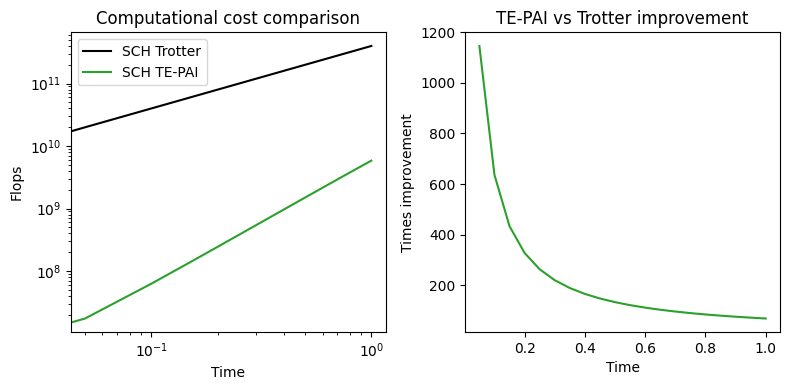

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].set_ylabel('Flops'); ax[0].set_xlabel('Time')
ax[0].set_title('Computational cost comparison')
ax[0].plot(times, [g * MAX_BOND**3 for g in sch_trotter_lengths], label='SCH Trotter', color="black")
# ax[0].plot(times, [g * MAX_BOND**3 for g in nnn_trotter_lengths], label='NNN Trotter')
ax[0].plot(times, [g * MAX_BOND**3 for g in sch_tepai_lengths], label='SCH TE-PAI', color="tab:green")
ax[0].loglog()
ax[0].legend()

ax[1].set_ylabel('Times improvement'); ax[1].set_xlabel('Time')
ax[1].set_title('TE-PAI vs Trotter improvement')
ax[1].plot(times, np.array(sch_trotter_lengths) / np.array(sch_tepai_lengths), label='TE-PAI advantage', color="tab:green")

plt.tight_layout()
plt.show()
